# Section I: Description of the raw DFT databases

The `database` folder in the Github Repo contains all the raw DFT calculated databases for the CoMoFeNiCu high-entropy alloy (HEA) as catalysts:

1. Low-cost DFT calculations, performed using 4-layer constrained slabs, 300 eV energy cutoff, 2x2x1 k-points. Both the two databases of 500 pure HEA slabs (*cons_all_bare_hea_converged_encut300_221_final.db*) and the 2,643 binding HEA configurations (*cons_all_adsp_hea_converged_encut300_221_final.db*) were stored in the `database/constrained_encut300_kpts221/` folder.

2. High-accuracy DFT calculations, performed using 4-layer slab with top two layers allowed to relax, 700 eV cutoff, 3x3x1 k-points. Both the two databases of 500 pure HEA slabs (*relx_all_bare_hea_converged_encut700_331_final.db*) and the 2,643 binding HEA configuration (*relx_all_adsp_hea_converged_encut700_331_final.db*) were stored in the `database/relaxed_encut700_kpts331/` folder.

All of the .db files were stored as ASE.db format. The detailed information about ASE db can be found here: https://wiki.fysik.dtu.dk/ase/ase/db/db.html.

The following keys were applied to all the two bare CoMoFeNiCu HEA surfaces databases.


1.   **hea_id**: index for the type of composition of HEA. The following values can be accepted: 'co15', 'co25', 'co35', 'co45', and 'co55'. These values refer five individual HEA compositions: Co4Cu4Fe4Mo20Ni4, Co9Cu4Fe4Mo15Ni4, Co12Cu4Fe4Mo12Ni4, Co15Cu4Fe4Mo9Ni4, and Co20Cu4Fe4Mo4Ni4, respectively.
2.   **surface_id**: An index used to identify individual simulated HEA surfaces within the same hea_id. Acceptable values for surface_id range from 0 to 99. Each unique surface_id corresponds to a different atom arrangement for the respective HEA configuration.
3. **ads**: An key to represent the type of adsorbates binding on the HEA surface. Since these are bare surfaces, the ads key is default to string 'bare'.
4. **has_converged**: An key to represent if the corresponding structure has converged. All the has_converged key is True in our databases.
5. **encut**: For low-cost DFT database, encut=300; For high-accuracy DFT database, encut=700.
6. **kpts**: For low-cost DFT database, kpts=221; For high-accuracy DFT database, kpts=331.
7. **relaxed**: For low-cost DFT database, relaxed=False, as all surface atoms in the HEA structure were constrained; For high-accuracy DFT database, relaxed=True, as the top two layers were allowed to relax.



The following keys were applied to all the two CoMoFeNiCu HEA surfaces databases with binded adsorbates (H, N, NH, NH2, and NH3):


1. **hea_id**: same as the above description.
2. **surface_id**: same as the above description.
3. **ads**: An key to represent the type of adsorbates binding on the HEA surface. The following string values are acceptable: 'H', 'N', 'NH', 'NH2', 'NH3'.
4. **ads_site**: An key which refers the type of adsorption site for the binding species. For ads=H and ads=N, the available string values are: fcc / hcp (the three-folds adsorption site); For ads=NH and ads=NH2, the available string values are: bridge / briidge_a / bridge_b (the two-folds bridge sites based on three possible orientations); For ads=NH3, the only available string values is ontop.
5. **site_id**: An key which represents the actual position of the binding site on the 3X3 top-view surface. As at most 9 positions possible, the available values are int from 0 to 8.
6. **has_converged**: same as the above description.
7. **encut**: same as the above description.
8. **kpts**: same as the above description.
9. **relaxed**: same as the above description.

As an example, the following command:

`ase db relx_all_adsp_hea_converged_encut700_331_final.db hea_id=co25 surface_id=40 ads=NH ads_site=bridge site_id=2`

will result in the following row of data in the relx_all_adsp_hea_converged_encut700_331_final.db:


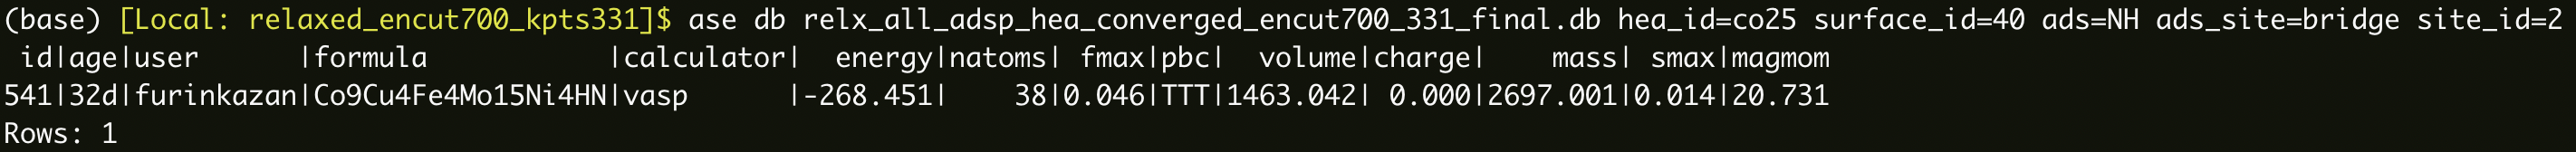

-------------

# Section II: Demo for loading the calculated binding energies

The CoMoFeNiCu HEA database consists of 2 * 2,643 = 5,286 unique binding (adsorption) energies and geometries. The high-accuracy binding energies ($\Delta \text{E}_{\text{DFT}}^{\text{relax,high}}$) and the low DFT-accuracy binding energies $\Delta \text{E}_{\text{DFT}}^{\text{cons,low}}$ are calculated as:


\begin{equation}
  \Delta \text{E}_{\text{DFT}}^{\text{relax,high}} = \text{E}_{\text{ads/relaxed}} - \text{E}_{\text{relaxed}} - \text{E}_{\text{ads}}
\end{equation}

\begin{equation}
  \Delta \text{E}_{\text{DFT}}^{\text{cons,low}} = \text{E}_{\text{ads/constrained}} - \text{E}_{\text{constrained}} - \text{E}_{\text{ads}}
\end{equation}


where, $\text{E}_{\text{ads/relaxed}}$ and $\text{E}_{\text{ads/constrained}}$ represent the energies of relaxed and constrained adsorbate-bound surfaces, respectively; $\text{E}_{\text{relaxed}}$ and $\text{E}_{\text{constrained}}$ represent the energies of bare relaxed and constrained surfaces, respectively; $\text{E}_{\text{ads}}$ represents the DFT energy of each adsorbate in the gas-phase (with respect to H2 and N2). As entropic contributions are not included, here, we limit our discussion to the DFT-calculated binding energies.

The pre-calculated binding energies were processed as pandas dataframes and saved as pickle files (please refer the Python object serialization document for more information about pickle https://docs.python.org/3/library/pickle.html). And all the final were made available in the `binding-energies-files` folder in this Github Repo.



1.   The `Binding-energies-DFT-Low` sub-folder: all the $\Delta \text{E}_{\text{DFT}}^{\text{cons,low}}$ binding energies group by the key **ads**.

2.   The `Binding-energies-DFT-high` sub-folder: all the $\Delta \text{E}_{\text{DFT}}^{\text{relax,high}}$ binding energies group by the key **ads**.



In the following section, we provide the demo code for how to load the visualize our calculated binding energies for $\Delta \text{E}_{\text{DFT}}^{\text{relax,high}}$ Vs. $\Delta \text{E}_{\text{DFT}}^{\text{cons,low}}$.

## Install Necessary Packages

- We need the Atomic Simulation Environment (ASE) package: https://wiki.fysik.dtu.dk/ase/

In [1]:
%%capture
! pip install ase==3.19.1

In [2]:
import sys, os, shutil
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import seaborn as sns
from pylab import *

In [3]:
# function for figure format

def set_fig_properties(ax_list, panel_color_str='black', line_width=2):
    tick_length = 5
    tick_width = 2
    tick_minor_length = 3

    for ax in ax_list:
        ax.tick_params(which='major',
                       length=tick_length, width=tick_width)
        ax.tick_params(which='minor',
                       length=tick_minor_length, width=tick_width)
        ax.tick_params(which='both', axis='both', direction='in',
                       left=True, right=True, top=True)
        ax.spines['bottom'].set_color(panel_color_str)
        ax.spines['top'].set_color(panel_color_str)
        ax.spines['left'].set_color(panel_color_str)
        ax.spines['right'].set_color(panel_color_str)

        ax.spines['bottom'].set_linewidth(line_width)
        ax.spines['top'].set_linewidth(line_width)
        ax.spines['left'].set_linewidth(line_width)
        ax.spines['right'].set_linewidth(line_width)

        for t in ax.xaxis.get_ticklines(): t.set_color(panel_color_str)
        for t in ax.yaxis.get_ticklines(): t.set_color(panel_color_str)
        for t in ax.xaxis.get_ticklines(): t.set_linewidth(line_width)
        for t in ax.yaxis.get_ticklines(): t.set_linewidth(line_width)

## Reload pickle-dataframes and make the $\Delta \text{E}_{\text{DFT}}^{\text{relax,high}}$ Vs. $\Delta \text{E}_{\text{DFT}}^{\text{cons,low}}$ plot

- Please load the files from the `binding-energies-files` folder to the designate path of this notebook.

In [4]:
# Load the previous pickle files -- E_low

pickle_adse_file_path = './'

with open(pickle_adse_file_path + 'H_cons_AdsE_df_srt.pickle', 'rb') as handle:
    H_cons_AdsE_df_srt = pickle.load(handle)

with open(pickle_adse_file_path + 'N_cons_AdsE_df_srt.pickle', 'rb') as handle:
    N_cons_AdsE_df_srt = pickle.load(handle)

with open(pickle_adse_file_path + 'NH_cons_AdsE_df_srt.pickle', 'rb') as handle:
    NH_cons_AdsE_df_srt = pickle.load(handle)

with open(pickle_adse_file_path + 'NH2_cons_AdsE_df_srt.pickle', 'rb') as handle:
    NH2_cons_AdsE_df_srt = pickle.load(handle)

with open(pickle_adse_file_path + 'NH3_cons_AdsE_df_srt.pickle', 'rb') as handle:
    NH3_cons_AdsE_df_srt = pickle.load(handle)

In [5]:
print(H_cons_AdsE_df_srt.shape)
print(N_cons_AdsE_df_srt.shape)
print(NH_cons_AdsE_df_srt.shape)
print(NH2_cons_AdsE_df_srt.shape)
print(NH3_cons_AdsE_df_srt.shape)

(480, 1)
(466, 1)
(586, 1)
(570, 1)
(541, 1)


In [6]:
# Load the previous pickle files -- E_high

pickle_E_high_df_file_path = './'

with open(pickle_E_high_df_file_path + 'H_relx_AdsE_df_srt.pickle', 'rb') as handle:
    H_relx_AdsE_df_srt = pickle.load(handle)

with open(pickle_E_high_df_file_path + 'N_relx_AdsE_df_srt.pickle', 'rb') as handle:
    N_relx_AdsE_df_srt = pickle.load(handle)

with open(pickle_E_high_df_file_path + 'NH_relx_AdsE_df_srt.pickle', 'rb') as handle:
    NH_relx_AdsE_df_srt = pickle.load(handle)

with open(pickle_E_high_df_file_path + 'NH2_relx_AdsE_df_srt.pickle', 'rb') as handle:
    NH2_relx_AdsE_df_srt = pickle.load(handle)

with open(pickle_E_high_df_file_path + 'NH3_relx_AdsE_df_srt.pickle', 'rb') as handle:
    NH3_relx_AdsE_df_srt = pickle.load(handle)

In [7]:
print(H_relx_AdsE_df_srt.shape)
print(N_relx_AdsE_df_srt.shape)
print(NH_relx_AdsE_df_srt.shape)
print(NH2_relx_AdsE_df_srt.shape)
print(NH3_relx_AdsE_df_srt.shape)

(480, 1)
(466, 1)
(586, 1)
(570, 1)
(541, 1)


In [8]:
# merge the databases and prepare for the E_low vs E_high DFT binding energies plots

final_df_H = H_cons_AdsE_df_srt.merge(H_relx_AdsE_df_srt, left_index=True, right_index=True, how='inner')
final_df_H['adsorbate'] = 'H'
final_df_H['error'] = final_df_H['cons_AdsE'] - final_df_H['relx_AdsE']
final_df_H

final_df_N = N_cons_AdsE_df_srt.merge(N_relx_AdsE_df_srt, left_index=True, right_index=True, how='inner')
final_df_N['adsorbate'] = 'N'
final_df_N['error'] = final_df_N['cons_AdsE'] - final_df_N['relx_AdsE']
final_df_N

final_df_NH = NH_cons_AdsE_df_srt.merge(NH_relx_AdsE_df_srt, left_index=True, right_index=True, how='inner')
final_df_NH['adsorbate'] = 'NH'
final_df_NH['error'] = final_df_NH['cons_AdsE'] - final_df_NH['relx_AdsE']
final_df_NH

final_df_NH2 = NH2_cons_AdsE_df_srt.merge(NH2_relx_AdsE_df_srt, left_index=True, right_index=True, how='inner')
final_df_NH2['adsorbate'] = '$\mathdefault{NH_2}$'
final_df_NH2['error'] = final_df_NH2['cons_AdsE'] - final_df_NH2['relx_AdsE']
final_df_NH2

final_df_NH3 = NH3_cons_AdsE_df_srt.merge(NH3_relx_AdsE_df_srt, left_index=True, right_index=True, how='inner')
final_df_NH3['adsorbate'] = '$\mathdefault{NH_3}$'
final_df_NH3['error'] = final_df_NH3['cons_AdsE'] - final_df_NH3['relx_AdsE']
final_df_NH3

final_df = pd.concat([final_df_H, final_df_N, final_df_NH, final_df_NH2, final_df_NH3])
final_df

,cons_AdsE,relx_AdsE,adsorbate,error
system_key,,,,
1003_co15_91_H_fcc_5,-0.561062,-0.636521,H,0.075459
1014_co15_92_H_fcc_0,-0.657077,-0.602402,H,-0.054675
1025_co15_93_H_fcc_7,-0.755425,-0.828431,H,0.073006
1046_co15_95_H_fcc_6,-2.013766,-0.793828,H,-1.219938
1068_co15_97_H_fcc_2,-0.760064,-0.495167,H,-0.264897
...,...,...,...,...
978_co15_88_NH3_ontop_6,-2.305334,-2.306392,$\mathdefault{NH_3}$,0.001058
988_co15_89_NH3_ontop_3,-2.976174,-1.038477,$\mathdefault{NH_3}$,-1.937697
989_co15_89_NH3_ontop_7,-3.713691,-1.864122,$\mathdefault{NH_3}$,-1.849569


## Plot of Figure 3(a)

<ipython-input-9-46a59d7a9f4d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(-5, 3, 1), fontsize=15)
<ipython-input-9-46a59d7a9f4d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(-5, 3, 1), fontsize=15)


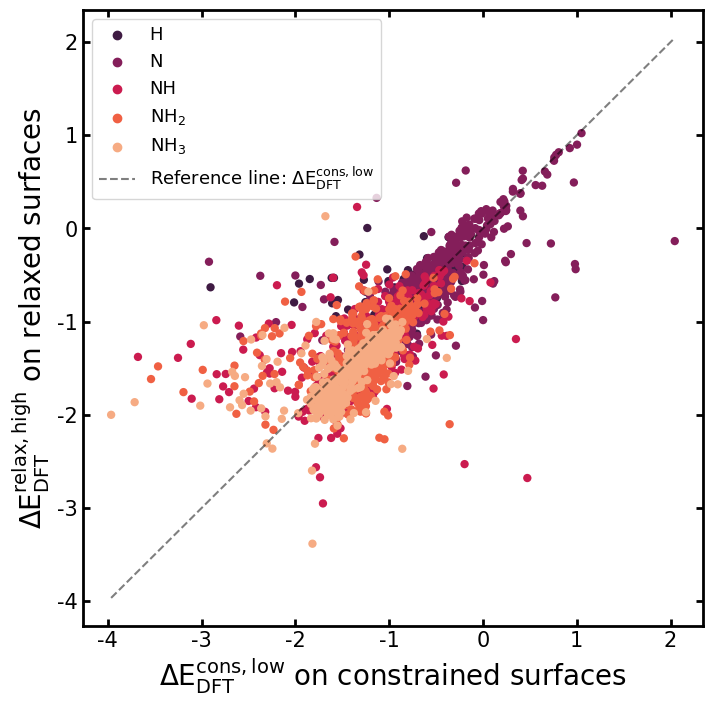

In [9]:
f, ax = plt.subplots(figsize=(8, 8))
set_fig_properties([gca()])

adsorbates = ['H', 'N', 'NH', '$\mathdefault{NH_2}$', '$\mathdefault{NH_3}$']
sns.scatterplot(x="cons_AdsE", y="relx_AdsE",
                hue="adsorbate",# style="hea_id",
                # palette="blend:#7AB,#EDA",
                palette="rocket",
                # palette="golden",
                hue_order=adsorbates,
                sizes=(1, 8),
                linewidth=0,
                data=final_df,
                ax=ax)

sns.lineplot(x=final_df['cons_AdsE'], y=final_df['cons_AdsE'], c='k', linestyle='--',
                label="Reference line: \u0394$\mathdefault{E^{cons, low}_{DFT}}$", alpha=0.5)
ax.set_xticklabels(range(-5, 3, 1), fontsize=15)
ax.set_yticklabels(range(-5, 3, 1), fontsize=15)
plt.legend(fontsize=13, loc='upper left')

# Set plot title and axis labels
# plt.title("Distribution of CPU Cost")
plt.xlabel('\u0394$\mathdefault{E^{cons, low}_{DFT}}$ on constrained surfaces', fontsize=20)
plt.ylabel('\u0394$\mathdefault{E^{relax, high}_{DFT}}$ on relaxed surfaces', fontsize=20)

plt.show()

## Plot of Figure 3(b)

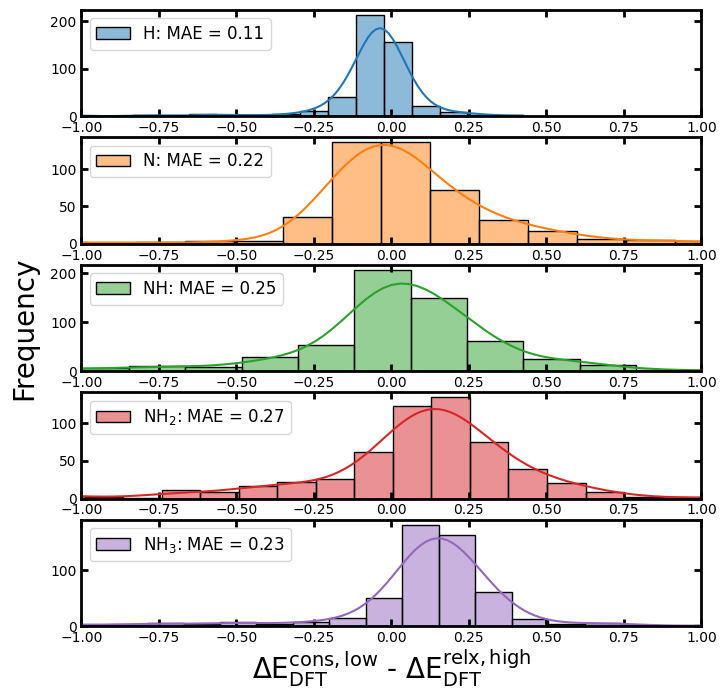

In [10]:
plt.figure(figsize=(8, 8))
plt.subplot(5, 1, 1)
set_fig_properties([gca()])

sns.histplot(data=final_df_H, x='error', color=colors[0], bins=30, kde=True,
             ec='black',
             label="H: MAE = 0.11")
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('', fontsize=16)
plt.xlim(-1, 1)

plt.subplot(5, 1, 2)
set_fig_properties([gca()])
sns.histplot(data=final_df_N, x='error', color=colors[1], bins=30, kde=True,
             ec='black',
             label="N: MAE = 0.22")
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('', fontsize=16)
plt.xlim(-1, 1)

plt.subplot(5, 1, 3)
set_fig_properties([gca()])
sns.histplot(data=final_df_NH, x='error', color=colors[2], bins=30, kde=True,
             ec='black',
             label="NH: MAE = 0.25")
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('', fontsize=16)
plt.xlim(-1, 1)

plt.subplot(5, 1, 4)
set_fig_properties([gca()])
sns.histplot(data=final_df_NH2, x='error', color=colors[3], bins=30, kde=True,
             ec='black',
             label="$\mathdefault{NH_2}$: MAE = 0.27")
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('', fontsize=16)
plt.xlim(-1, 1)

plt.subplot(5, 1, 5)
set_fig_properties([gca()])
sns.histplot(data=final_df_NH3, x='error', color=colors[4], bins=30, kde=True,
             ec='black',
             label="$\mathdefault{NH_3}$: MAE = 0.23")
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('', fontsize=16)
plt.xlim(-1, 1)

xlabel('\u0394$\mathdefault{E^{cons, low}_{DFT}}$ - \u0394$\mathdefault{E^{relx, high}_{DFT}}$', fontdict={'fontsize': 20})
gca().xaxis.set_label_coords(0.5, -0.2)

ylabel('Frequency', fontdict={'fontsize': 20})
gca().yaxis.set_label_coords(-0.07, 2.8)

plt.show()